In [2]:
#2.3.1. Загрузка данных и первичный анализ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.inspection import permutation_importance
import json
import joblib

In [3]:
df = pd.read_csv("S06-hw-dataset-01.csv")
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [5]:
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [6]:
df["target"].value_counts(normalize=True)

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

In [7]:
df.dtypes

id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

In [8]:
df.isna().sum()

id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

In [9]:
X = df.loc[:, df.columns.difference(["id", "target"])]
y = df.loc[:, "target"]

In [10]:
# 2.3.2. Train/Test-сплит и воспроизводимость
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Изначально метод определяет выборки рандомно. Заданное значение seed'a гарантирует, что разделение данных будет идентичным при каждом запуске блока с кодом. Stratify же отвечает за пропорцию классов в выходных наборах. Значение y(таргет-вектора исходного датасета) параметра stratify позволяет сохранить распределение классов в выходных наборах соразмерное с пропорцией классов в исходных данных. Совокупность этих параметров обеспечивает одинаковые входные данные для каждой отдельной тестируемой модели, что позволит справедливо сравнить эффективность разных моделей для решения поставленной задачи. Помимо этого, такой подход позволяет сделать удобнее отладку кода, так как при каждом отдельном прогоне дебага данные не будут меняться.

In [11]:
# 2.3.3. Baseline’ы
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [12]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42,))
])

parameters = {"logreg__C": [0.01, 0.1, 1.0, 10.0]}

grid_search = GridSearchCV(pipe, parameters)

grid_search.fit(X_train, y_train)

logreg = grid_search.best_estimator_

In [13]:
dummy_y_pred = dummy.predict(X_test)
logreg_y_pred = logreg.predict(X_test)
dummy_y_pred_proba = dummy.predict_proba(X_test)[:, 1]
logreg_y_pred_proba = logreg.predict_proba(X_test)[:, 1]

dummy_accuracy = accuracy_score(y_test, dummy_y_pred)
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)

dummy_f1 = f1_score(y_test, dummy_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)

dummy_roc_auc = roc_auc_score(y_test, dummy_y_pred_proba)
logreg_roc_auc = roc_auc_score(y_test, logreg_y_pred_proba)

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_y_pred_proba)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_y_pred_proba)

print(f"Dummy:\naccuracy: {dummy_accuracy}\nf1: {dummy_f1}\nROC-AUC: {dummy_roc_auc}\n\nLogreg:\naccuracy: {logreg_accuracy}\nf1: {logreg_f1}\nROC-AUC: {logreg_roc_auc}")

Dummy:
accuracy: 0.6766666666666666
f1: 0.0
ROC-AUC: 0.5

Logreg:
accuracy: 0.8275
f1: 0.7080394922425951
ROC-AUC: 0.8746913247168757


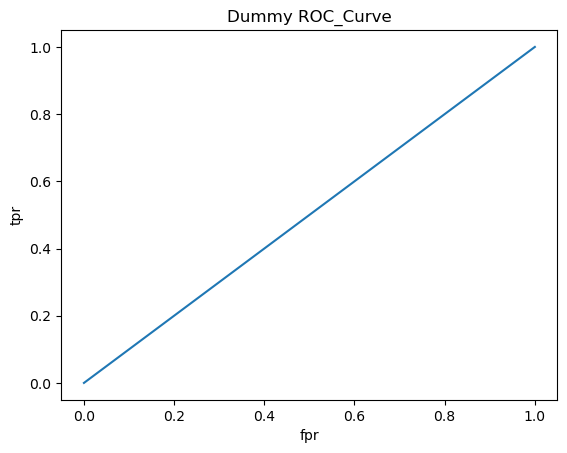

In [14]:
plt.figure()
plt.plot(dummy_fpr, dummy_tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Dummy ROC_Curve")
plt.savefig("./artifacts/figures/dummy_roc_curve.png")
plt.show()

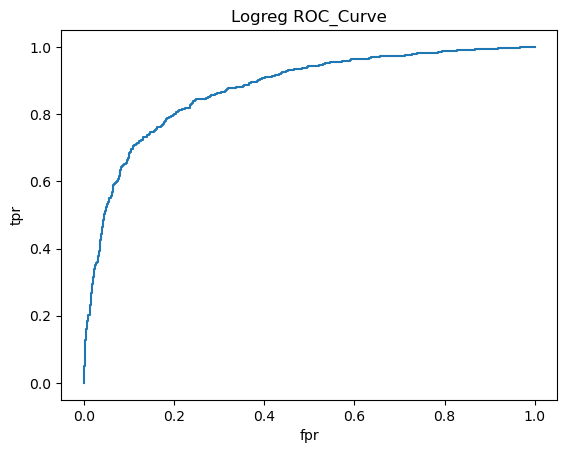

In [15]:
plt.figure()
plt.plot(logreg_fpr, logreg_tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Logreg ROC_Curve")
plt.savefig("./artifacts/figures/logreg_roc_curve.png")
plt.show()

In [16]:
dummy_confusion_matrix = confusion_matrix(y_test, dummy_y_pred)
print(f"Dummy Confusion Matrix:\n{dummy_confusion_matrix}")

Dummy Confusion Matrix:
[[1624    0]
 [ 776    0]]


In [17]:
logreg_confusion_matrix = confusion_matrix(y_test, logreg_y_pred)
print(f"Logreg Confusion Matrix:\n{logreg_confusion_matrix}")

Logreg Confusion Matrix:
[[1484  140]
 [ 274  502]]


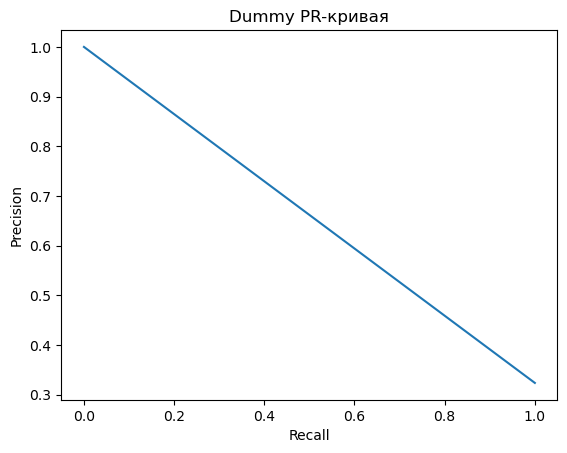

In [18]:
dummy_precision, dummy_recall, dummy_thresholds = precision_recall_curve(y_test, dummy_y_pred_proba)
logreg_precision, logreg_recall, logreg_thresholds = precision_recall_curve(y_test, logreg_y_pred_proba)

plt.figure()
plt.plot(dummy_recall, dummy_precision)
plt.title("Dummy PR-кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("./artifacts/figures/dummy_PR_curve.png")
plt.show()

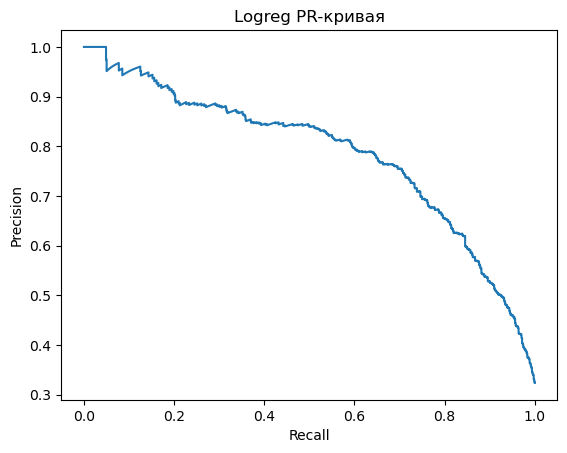

In [19]:
plt.figure()
plt.plot(logreg_recall, logreg_precision)
plt.title("Logreg PR-кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("./artifacts/figures/logreg_PR_curve.png")
plt.show()

PR-кривая dummy обращается в линию с началом в точке recall=0, precision=1 и убывает до recall=1, precision=0. Это означает, что бейзлайн отлично угадывает один из классов. Но чем больше становится значение recall - наличие второго класса - тем больше падает точность. Это происходит потому, как был поставлен вариант предсказывать всегда только лишь один - наиболее распространённый - класс. PR-кривая логистической регрессии же теряет точность чуть медленнее и имеет приличные показатели в интервале, где recall принимает значения от 0 до 0.2, затем следует зона стабильной точности, примерно равной 0.85 на интервале от 0.2 до 0.57, и только потом начинает стремительно падать. Можно сделать вывод, что в среднем модель логистической регрессии более эффективна для решения поставленной задачи. Убедиться в данном заключении можно взглянув на точность accuracy, а также сравнив графики roc-кривых - на них видно, что логистическая регрессия имеет более оптимальное соотношение доли правильно определённых положительных случаев к доле неправильно определённых отрицательных случаев.

In [20]:
# 2.3.4. Модели недели 6 и 2.3.5. Метрики качества
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='roc_auc',
)

dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

dt_y_pred = dt_best.predict(X_test)
dt_y_pred_proba = dt_best.predict_proba(X_test)[:, 1]

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_roc_auc = roc_auc_score(y_test, dt_y_pred_proba)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_proba)

print(f"DecisionTree:\naccuracy: {dt_accuracy}\nf1: {dt_f1}\nROC-AUC: {dt_roc_auc}")

DecisionTree:
accuracy: 0.87625
f1: 0.8052459016393442
ROC-AUC: 0.9118140901934894


In [21]:
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

rf_y_pred = rf_best.predict(X_test)
rf_y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)

print(f"RandomForest:\naccuracy: {rf_accuracy}\nf1: {rf_f1}\nROC-AUC: {rf_roc_auc}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
RandomForest:
accuracy: 0.9254166666666667
f1: 0.8783140720598234
ROC-AUC: 0.9673010512416841


In [22]:
gb_param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_

gb_y_pred = gb_best.predict(X_test)
gb_y_pred_proba = gb_best.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_y_pred_proba)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_y_pred_proba)

print(f"GradientBoosting:\naccuracy: {gb_accuracy}\nf1: {gb_f1}\nROC-AUC: {gb_roc_auc}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
GradientBoosting:
accuracy: 0.9316666666666666
f1: 0.8908122503328895
ROC-AUC: 0.9694744743791581


In [23]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
)

stacking_clf.fit(X_train, y_train)

stacking_y_pred = stacking_clf.predict(X_test)
stacking_y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

stacking_accuracy = accuracy_score(y_test, stacking_y_pred)
stacking_f1 = f1_score(y_test, stacking_y_pred)
stacking_roc_auc = roc_auc_score(y_test, stacking_y_pred_proba)
stacking_fpr, stacking_tpr, _ = roc_curve(y_test, stacking_y_pred_proba)

print(f"StackingClassifier:\naccuracy: {stacking_accuracy}\nf1: {stacking_f1}\nROC-AUC: {stacking_roc_auc}")

StackingClassifier:
accuracy: 0.93
f1: 0.889763779527559
ROC-AUC: 0.9678588885785384


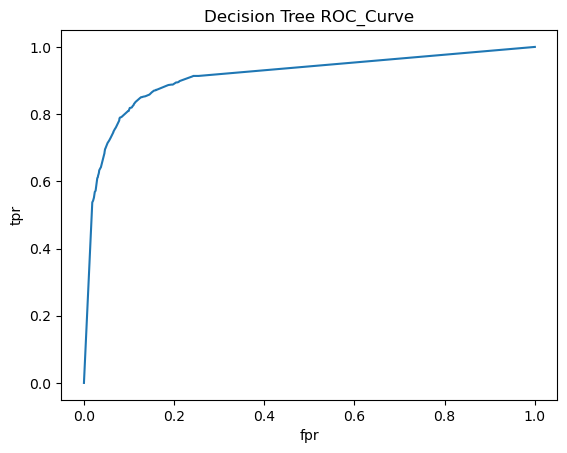

In [24]:
plt.figure()
plt.plot(dt_fpr, dt_tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Decision Tree ROC_Curve")
plt.savefig("./artifacts/figures/decision_tree_roc_curve.png")
plt.show()

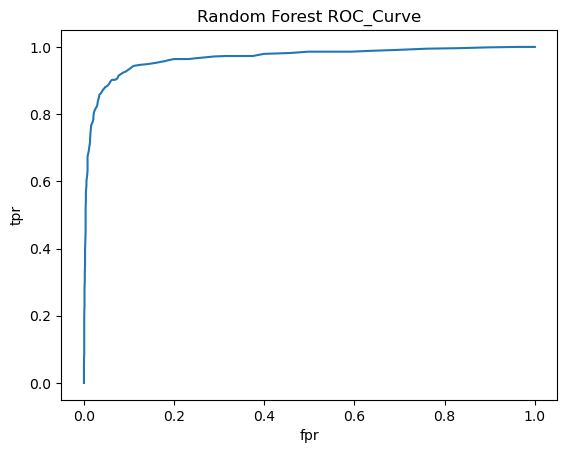

In [25]:
plt.figure()
plt.plot(rf_fpr, rf_tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Random Forest ROC_Curve")
plt.savefig("./artifacts/figures/random_forest_roc_curve.png")
plt.show()

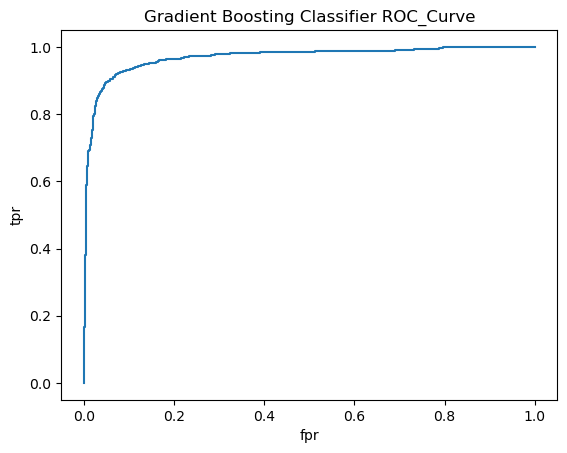

In [26]:
plt.figure()
plt.plot(gb_fpr, gb_tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Gradient Boosting Classifier ROC_Curve")
plt.savefig("./artifacts/figures/gradient_boosting_classifier_roc_curve.png")
plt.show()

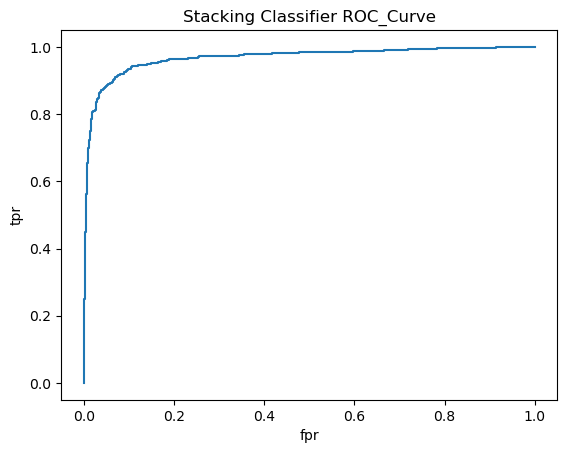

In [27]:
plt.figure()
plt.plot(stacking_fpr, stacking_tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Stacking Classifier ROC_Curve")
plt.savefig("./artifacts/figures/stacking_classifier_roc_curve.png")
plt.show()

In [28]:
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
gb_confusion_matrix = confusion_matrix(y_test, gb_y_pred)
stacking_confusion_matrix = confusion_matrix(y_test, stacking_y_pred)
print(f"Decision Tree confusion matrix:\n{dt_confusion_matrix}\n")
print(f"Random Forest confusion matrix\n{rf_confusion_matrix}\n")
print(f"Gradient Boosting Classifier\n{gb_confusion_matrix}\n")
print(f"Stacking Classifier confusion matrix\n{stacking_confusion_matrix}\n")

Decision Tree confusion matrix:
[[1489  135]
 [ 162  614]]

Random Forest confusion matrix
[[1575   49]
 [ 130  646]]

Gradient Boosting Classifier
[[1567   57]
 [ 107  669]]

Stacking Classifier confusion matrix
[[1554   70]
 [  98  678]]



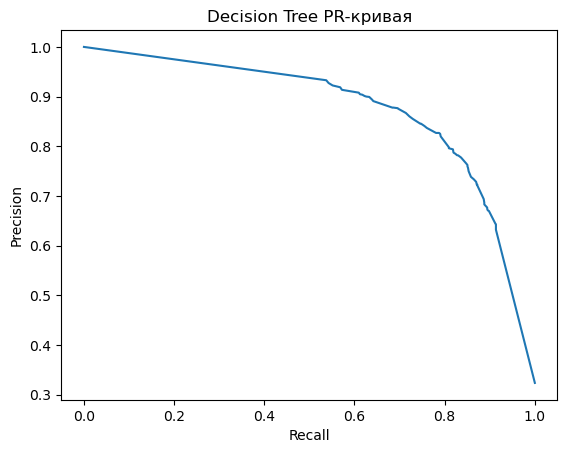

In [29]:
dt_precision, dt_recall, dt_thresholds = precision_recall_curve(y_test, dt_y_pred_proba)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_test, rf_y_pred_proba)
gb_precision, gb_recall, gb_thresholds = precision_recall_curve(y_test, gb_y_pred_proba)
stacking_precision, stacking_recall, stacking_thresholds = precision_recall_curve(y_test, stacking_y_pred_proba)


plt.figure()
plt.plot(dt_recall, dt_precision)
plt.title("Decision Tree PR-кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("./artifacts/figures/decision_tree_PR_curve.png")
plt.show()

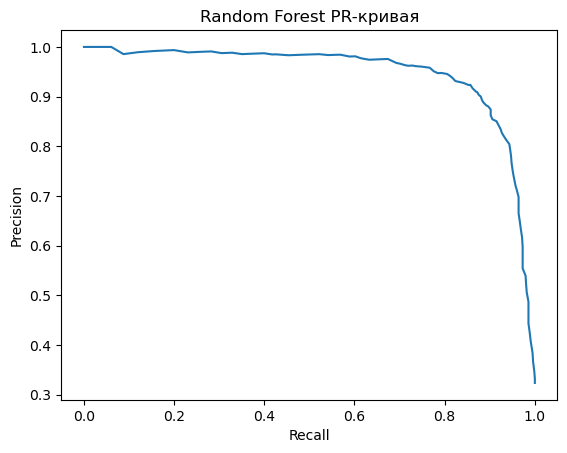

In [30]:
plt.figure()
plt.plot(rf_recall, rf_precision)
plt.title("Random Forest PR-кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("./artifacts/figures/random_forest_PR_curve.png")
plt.show()

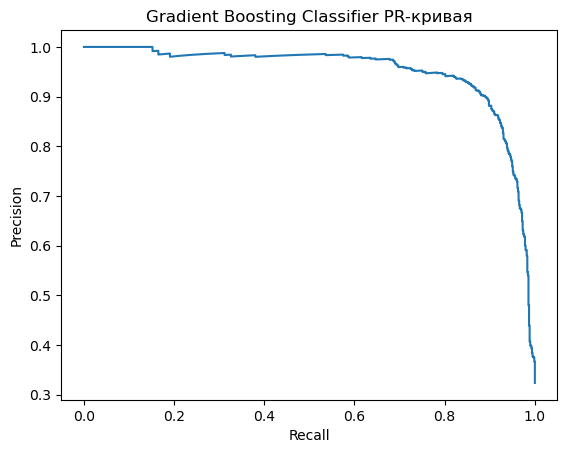

In [31]:
plt.figure()
plt.plot(gb_recall, gb_precision)
plt.title("Gradient Boosting Classifier PR-кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("./artifacts/figures/gradient_boosting_classifier_PR_curve.png")
plt.show()

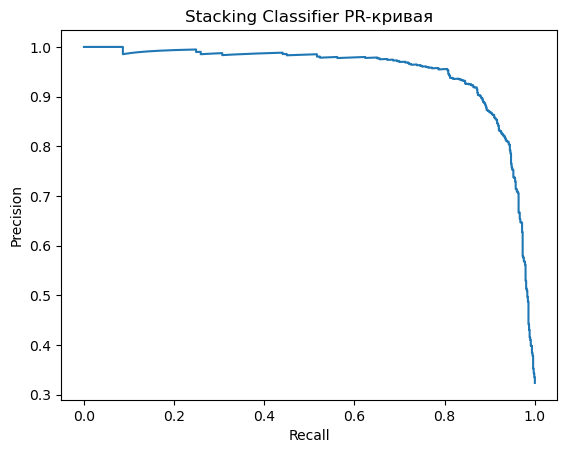

In [32]:
plt.figure()
plt.plot(stacking_recall, stacking_precision)
plt.title("Stacking Classifier PR-кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("./artifacts/figures/stacking_classifier_PR_curve.png")
plt.show()

In [33]:
print(f"Model;ROC\nDummy;{dummy_roc_auc}\nLogreg;{logreg_roc_auc}\nDecision Tree;{dt_roc_auc}\nRandom Forest;{rf_roc_auc}\nGradient Boosting Classifier;{gb_roc_auc}\nStacking Classifier;{stacking_roc_auc}")

Model;ROC
Dummy;0.5
Logreg;0.8746913247168757
Decision Tree;0.9118140901934894
Random Forest;0.9673010512416841
Gradient Boosting Classifier;0.9694744743791581
Stacking Classifier;0.9678588885785384


Сравнив модели по метрикам, делаем вывод, что лучшая модель для решения поставленной задачи - Gradient Boosting Classifier. Продолжим работу именно с ней.

In [34]:
# 2.3.6. Интерпретация
print("Корреляция признаков с таргетом - изначальное ожидание важности признаков")
correlations = {}
for i in range(1, 25):
    feature = "num"
    if (i < 10):
        feature += "0"
    feature += str(i)
    corr = df[feature].corr(df['target'])
    correlations[feature] = corr

top_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:15]
print(f"Топ-15 самых коррелирующих признаков:")
for feature, corr in top_corr:
    print(f"  {feature}: {corr:.4f}")

Корреляция признаков с таргетом - изначальное ожидание важности признаков
Топ-15 самых коррелирующих признаков:
  num19: -0.4806
  num18: 0.2428
  num07: 0.2279
  num06: -0.2201
  num17: -0.2174
  num20: -0.2120
  num22: 0.2101
  num14: 0.1989
  num02: 0.1424
  num16: -0.0872
  num21: -0.0662
  num13: -0.0439
  num08: -0.0307
  num01: 0.0168
  num09: -0.0156


Из корреляции сделаем предположение, что сильнее всего на качество модели влияют num19, num18, num07, num06 и num17. Проверим это далее.

In [35]:
result = permutation_importance(
    gb_grid, 
    X_test, 
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc',
)

importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

importance_df = importance_df.sort_values('importance_mean', ascending=False)
top15Importance = importance_df.head(15)

print("Top-15 признаков по важности:")
print(top15Importance)

Top-15 признаков по важности:
   feature  importance_mean  importance_std
20   num18         0.074861        0.005514
21   num19         0.067961        0.003152
9    num07         0.039056        0.001229
6    num04         0.017397        0.001489
26   num24         0.016949        0.001361
22   num20         0.011144        0.001495
16   num14         0.009341        0.000842
3    num01         0.008980        0.000919
24   num22         0.007971        0.001028
18   num16         0.007450        0.000886
23   num21         0.006875        0.001036
19   num17         0.005519        0.000905
10   num08         0.004421        0.000844
15   num13         0.002878        0.001119
4    num02         0.002275        0.000513


Видно, что сильнее всего влияют признаки num18, num19, num07, num04 и num24. Сравнив изначальное предположение о важности признаков, сделанное на основе корреляции, и настоящий топ полей, наиболее влияющих на качество модели признаков, видим, что присуствуют серьёзные отличия. Да, num18, num19, действительно, находятся на первых местах в обоих случаях, но вот остальные позиции критично различаются. Это означает, что модель нашла сложные зависимости, которые не были очевидны из простого статистического анализа, оправдав необходимость применения нелинейной модели для решения поставленной задачи.

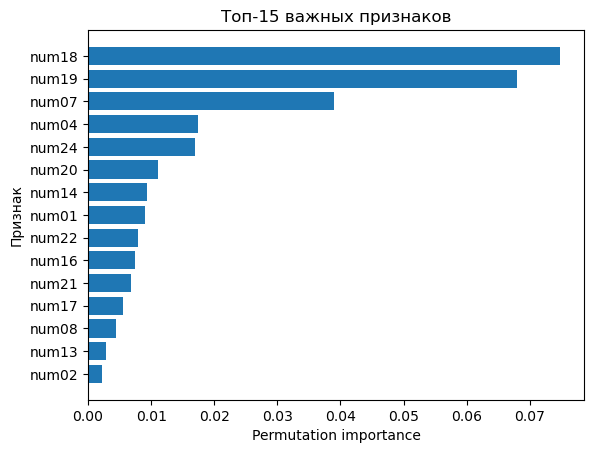

In [36]:
# 2.4. Артефакты эксперимента
metrics_dict = {
    'Dummy': {'accuracy': dummy_accuracy, 'f1': dummy_f1, 'roc_auc': dummy_roc_auc},
    'LogisticRegression': {'accuracy': logreg_accuracy, 'f1': logreg_f1, 'roc_auc': logreg_roc_auc},
    'DecisionTree': {'accuracy': dt_accuracy, 'f1': dt_f1, 'roc_auc': dt_roc_auc},
    'RandomForest': {'accuracy': rf_accuracy, 'f1': rf_f1, 'roc_auc': rf_roc_auc},
    'GradientBoosting': {'accuracy': gb_accuracy, 'f1': gb_f1, 'roc_auc': gb_roc_auc},
    'Stacking': {'accuracy': stacking_accuracy, 'f1': stacking_f1, 'roc_auc': stacking_roc_auc}
}

with open('./artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics_dict, f, indent=2)

search_summaries = {
    'DecisionTree': {'best_params': dt_grid.best_params_, 'best_score': dt_grid.best_score_},
    'RandomForest': {'best_params': rf_grid.best_params_, 'best_score': rf_grid.best_score_},
    'GradientBoosting': {'best_params': gb_grid.best_params_, 'best_score': gb_grid.best_score_}
}

with open('./artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)

joblib.dump(gb_best, './artifacts/best_model.joblib')

best_model_meta = {
    'model_name': 'GradientBoostingClassifier',
    'best_params': gb_grid.best_params_,
    'test_metrics': {
        'accuracy': gb_accuracy,
        'f1': gb_f1,
        'roc_auc': gb_roc_auc
    }
}

with open('./artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)

plt.figure()
plt.barh(top15Importance['feature'], top15Importance['importance_mean'])
plt.xlabel("Permutation importance")
plt.ylabel("Признак")
plt.title("Топ-15 важных признаков")
plt.gca().invert_yaxis()
plt.savefig('./artifacts/figures/feature_importance.png')
plt.show()

In [37]:
#Устойчивость: что будет, если поменять `random_state` (хотя бы 5 прогонов для 1-2 моделей)
states = [21, 42, 100, 300, 1000]
dt_param_grid = {
        'max_depth': [3, 5, 7, None],
        'min_samples_leaf': [1, 5, 10]
    }

for state in states:
    dt_grid = GridSearchCV(
        DecisionTreeClassifier(random_state=state),
        dt_param_grid,
        cv=5,
        scoring='roc_auc',
    )

    dt_grid.fit(X_train, y_train)
    dt_best = dt_grid.best_estimator_

    dt_y_pred = dt_best.predict(X_test)
    dt_y_pred_proba = dt_best.predict_proba(X_test)[:, 1]

    dt_accuracy = accuracy_score(y_test, dt_y_pred)
    dt_f1 = f1_score(y_test, dt_y_pred)
    dt_roc_auc = roc_auc_score(y_test, dt_y_pred_proba)
    dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_proba)

    print(f"DecisionTree(random_state={state}):\naccuracy: {dt_accuracy}\nf1: {dt_f1}\nROC-AUC: {dt_roc_auc}\n")

DecisionTree(random_state=21):
accuracy: 0.8758333333333334
f1: 0.8049738219895288
ROC-AUC: 0.9122378243867758

DecisionTree(random_state=42):
accuracy: 0.87625
f1: 0.8052459016393442
ROC-AUC: 0.9118140901934894

DecisionTree(random_state=100):
accuracy: 0.8758333333333334
f1: 0.8042049934296978
ROC-AUC: 0.9100175841755116

DecisionTree(random_state=300):
accuracy: 0.8770833333333333
f1: 0.8070634401569654
ROC-AUC: 0.9112169741252347

DecisionTree(random_state=1000):
accuracy: 0.8766666666666667
f1: 0.8060288335517692
ROC-AUC: 0.9095077541770351

